## __Holiday Package Prediciton__

### 1) __Problem statement__.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) __Data Collection__.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [21]:
# Import Neccessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('..\Lesson_016-Random_Forest\Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [23]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### __Understand Data Features__

__CustomerID__ - 
Unique customer ID


__ProdTaken__ - 
Product is taken or not.


__Age__ - 
Age of customer


__TypeofContact__ - 
How customer was contacted (Company Invited or Self Inquiry)


__CityTier__ - 
City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3


__DurationOfPitch__ - 
Duration of the pitch by a salesperson to the customer


__Occupation__ - 
Occupation of customer


__Gender__ - 
Gender of customer


__NumberOfPersonVisiting__ - 
Total number of persons planning to take the trip with the customer


__NumberOfFollowups__ - 
Total number of follow-ups has been done by the salesperson after the sales pitch

__ProductPitched__ - 
Product pitched by the salesperson


__PreferredPropertyStar__ - 
Preferred hotel property rating by customer


__MaritalStatus__ - 
Marital status of customer


__NumberOfTrips__ - 
Average number of trips in a year by customer


__Passport__ - 
The customer has a passport or not (0: No, 1: Yes)


__PitchSatisfactionScore__ - 
Sales pitch satisfaction score


__OwnCar__ - 
Whether the customers own a car or not (0: No, 1: Yes)


__NumberOfChildrenVisiting__ - 
Total number of children with age less than 5 planning to take the trip with the customer


__Designation__ - 
Designation of the customer in the current organization


__MonthlyIncome__ - 
Gross monthly income of the customer

## __Data Cleaning__
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [24]:
# delete unneccessary columns
df.drop('CustomerID', axis = 1, inplace = True)

In [25]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [26]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(df[col].value_counts())
        print("-----------------------------------\n")

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
-----------------------------------

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
-----------------------------------

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
-----------------------------------

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
-----------------------------------

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
-----------------------------------

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
-----------------------------------



In [27]:
# correct category of Gender and MaritalStatus

df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
print(df['Gender'].value_counts())
print("-----------------------------\n")

df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')
print(df['MaritalStatus'].value_counts())

Gender
Male      2916
Female    1972
Name: count, dtype: int64
-----------------------------

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64


In [28]:
# Feature with Nan Values

features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

for col in features_with_na:
    print(col, '--> ', np.round(df[col].isnull().mean()*100, 2), '% Missing Values')

Age -->  4.62 % Missing Values
TypeofContact -->  0.51 % Missing Values
DurationOfPitch -->  5.14 % Missing Values
NumberOfFollowups -->  0.92 % Missing Values
PreferredPropertyStar -->  0.53 % Missing Values
NumberOfTrips -->  2.86 % Missing Values
NumberOfChildrenVisiting -->  1.35 % Missing Values
MonthlyIncome -->  4.77 % Missing Values


In [29]:
df[features_with_na].head()

,Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,Self Enquiry,6.0,3.0,3.0,1.0,0.0,20993.0
1,49.0,Company Invited,14.0,4.0,4.0,2.0,2.0,20130.0
2,37.0,Self Enquiry,8.0,4.0,3.0,7.0,0.0,17090.0
3,33.0,Company Invited,9.0,3.0,3.0,2.0,1.0,17909.0
4,NaN,Self Enquiry,8.0,3.0,4.0,1.0,0.0,18468.0


In [30]:
# check statistics on col that contain nan to check mean is approc equal to 50 percetile or not -> to finalize apply mean or median

df[features_with_na].select_dtypes(exclude = 'O').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## __Imputing Null values__
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [31]:
# Age
df.Age.fillna(df['Age'].median(), inplace=True)

# Type od Contract
df.TypeofContact.fillna(df['TypeofContact'].mode()[0], inplace=True)

# Duration of Pitch
df.DurationOfPitch.fillna(df['DurationOfPitch'].median(), inplace=True)

# Number of FollowUps
df.NumberOfFollowups.fillna(df['NumberOfFollowups'].mode()[0], inplace=True)

# preferred Property Star
df.PreferredPropertyStar.fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)
 
# Number or Trips
df.NumberOfTrips.fillna(df['NumberOfTrips'].median(), inplace=True)
 
# Number Of Children Visiting
df.NumberOfChildrenVisiting.fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)
 
# Monthly Income
df.MonthlyIncome.fillna(df['MonthlyIncome'].median(), inplace=True)
 

In [32]:
df.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

All Nan Values handled!!

## __Feature Engineering__

### Feature Extraction

In [33]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [34]:
# Number of Person Visiting + Number of Child Visiting = TotalVisitors
df['TotalVisitors'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

df.drop(['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis = 1, inplace = True)

In [35]:
# Distribute Columns as Numerical, Discrete, Continuous and Categorical

num_features = [col for col in df.columns if df[col].dtype != 'O']
print(f"Total Number of Numerical Features : {len(num_features)}")
print(num_features)
print('------------------------------------------\n')

discrete_features = [col for col in num_features if df[col].nunique() <= 25]
print(f"Total Number of Discrete Features : {len(discrete_features)}")
print(discrete_features)
print('------------------------------------------\n')

continuous_features = [col for col in num_features if col not in discrete_features]
print(f"Total Number of Continuous Features : {len(continuous_features)}")
print(continuous_features)
print('------------------------------------------\n')

cat_features = [col for col in df.columns if df[col].dtype == 'O']
print(f"Total Number of Categorical Features : {len(cat_features)}")
print(cat_features)
print('------------------------------------------\n')

Total Number of Numerical Features : 12
['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisitors']
------------------------------------------

Total Number of Discrete Features : 9
['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisitors']
------------------------------------------

Total Number of Continuous Features : 3
['Age', 'DurationOfPitch', 'MonthlyIncome']
------------------------------------------

Total Number of Categorical Features : 6
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
------------------------------------------



## __Train Test Split and Model Training__

In [36]:
# Dependent and Independent Features
X = df.drop('ProdTaken', axis = 1)
y = df['ProdTaken']

y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

Data is imbalanced but Random Forest is less sensitive towards imbalanced data and when we train model we can use :                   
__class_weight='balanced'__

In [37]:
# Seprate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [38]:
# Create Column Transformer with 3 types of tansformers

cat_features = X.select_dtypes(include = 'O').columns
num_features = X.select_dtypes(exclude = 'O').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", numerical_transformer, num_features), 
        ("StandardScaler", cat_transformer, cat_features)
    ]
)

preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [39]:
## Applying transformer in training (fit_transform)
X_train = preprocessor.fit_transform(X_train)


## apply tansformation on test(transform)
X_test = preprocessor.transform(X_test)

## __Random Forest Classifier Training__

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression' : LogisticRegression(), 
    "Decision Tree" : DecisionTreeClassifier(), 
    "Random Forest" : RandomForestClassifier(), 
    "AdaBoost" : AdaBoostClassifier(), 
    "Gradient Boosting" : GradientBoostingClassifier()
    }

for i in range (len(models)) :
    model = list(models.values())[i]
    
    # Train model
    model.fit(X_train, y_train)

    # Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Performance matrix for Training Set
    train_acc = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average = 'weighted')
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Performance matrix for Testing Set
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i], ' Preformance Matrix : ')
    print('+ For Training Set ->')
    print(f'    - Accracy : {train_acc:.2f}')
    print(f'    - F1 Score : {train_f1:.2f}')
    print(f'    - Precision : {train_precision:.2f}')
    print(f'    - Recall : {train_recall:.2f}')
    print(f'    - Roc Auc Score : {train_roc_auc_score:.2f}\n')

    print('-----------------------------------------------------')

    print('+ For Testing Set ->')
    print(f'    - Accracy : {test_acc:.2f}')
    print(f'    - F1 Score : {test_f1:.2f}')
    print(f'    - Precision : {test_precision:.2f}')
    print(f'    - Recall : {test_recall:.2f}')
    print(f'    - Roc Auc Score : {test_roc_auc_score:.2f}\n')

    
    print("==========================================================\n")

Logistic Regression  Preformance Matrix : 
+ For Training Set ->
    - Accracy : 0.85
    - F1 Score : 0.82
    - Precision : 0.70
    - Recall : 0.30
    - Roc Auc Score : 0.64

-----------------------------------------------------
+ For Testing Set ->
    - Accracy : 0.84
    - F1 Score : 0.81
    - Precision : 0.69
    - Recall : 0.29
    - Roc Auc Score : 0.63


Decision Tree  Preformance Matrix : 
+ For Training Set ->
    - Accracy : 1.00
    - F1 Score : 1.00
    - Precision : 1.00
    - Recall : 1.00
    - Roc Auc Score : 1.00

-----------------------------------------------------
+ For Testing Set ->
    - Accracy : 0.92
    - F1 Score : 0.92
    - Precision : 0.82
    - Recall : 0.79
    - Roc Auc Score : 0.87


Random Forest  Preformance Matrix : 
+ For Training Set ->
    - Accracy : 1.00
    - F1 Score : 1.00
    - Precision : 1.00
    - Recall : 1.00
    - Roc Auc Score : 1.00

-----------------------------------------------------
+ For Testing Set ->
    - Accracy : 0.92

### __Hyper Parameter Tuning__

In [41]:
rf_params = {
    'max_depth' : [5, 8, 15, None, 10], 
    'max_features' : [5, 7, 'auto', 8, 'sqrt', 'log2'], 
    'min_samples_split' : [2, 8, 15, 20], 
    'n_estimators' : [100, 200, 500, 1000]
}

dt_params = {
    'max_depth' : [5, 8, 15, None, 10], 
    'max_features' : [5, 7, 'auto', 8, 'sqrt', 'log2'], 
    'min_samples_split' : [2, 8, 15, 20], 
}

adaboost = {
    'n_estimators': [30, 40, 50, 60, 70], 
    'learning_rate' : [0.1, 1.0, 10, 100], 
    
}

gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10]
                }

In [42]:
# Models list for Hyperparameter tuning

models_param = [
    ('RF', RandomForestClassifier(), rf_params), 
    ("DT", DecisionTreeClassifier(), dt_params), 
    ('AB', AdaBoostClassifier(), adaboost), 
    ("GB", GradientBoostingClassifier(), gradient_params)
]

models_param

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8, 'sqrt', 'log2'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('DT',
  DecisionTreeClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8, 'sqrt', 'log2'],
   'min_samples_split': [2, 8, 15, 20]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [30, 40, 50, 60, 70],
   'learning_rate': [0.1, 1.0, 10, 100]}),
 ('GB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, None, 10]})]

In [43]:
# Train models with there hyperParameterTuning

from sklearn.model_selection import RandomizedSearchCV

model_params = {}


for name, model, params in models_param :
    random = RandomizedSearchCV(estimator = model, param_distributions = params, n_iter = 100, cv = 3, verbose = 3, n_jobs = -1)

    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"--------------------Best Params for {model_name} ----------------")
    print(model_params[model_name], '\n')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------------Best Params for RF ----------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None} 

--------------------Best Params for DT ----------------
{'min_samples_split': 2, 'max_features': 7, 'max_depth': None} 

--------------------Best Params for AB ----------------
{'n_estimators': 70, 'learning_rate': 1.0} 

--------------------Best Params for GB ----------------
{'n_estimators': 500, 'min_samples_split': 15, 'max_depth': 10, 'loss': 'log_loss', 'criterion': 'friedman_mse'} 



In [45]:
models = {
    "Decision Tree" : DecisionTreeClassifier(min_samples_split = 2, max_features = 8, max_depth= 15), 
    "Random Forest" : RandomForestClassifier(n_estimators = 200, min_samples_split = 2, max_features = 5, max_depth = None), 
    "AdaBoost Classifier" : AdaBoostClassifier(n_estimators = 70, learning_rate = 1.0), 
    "Gradient Boosting" : GradientBoostingClassifier(n_estimators = 500, min_samples_split = 15, max_depth = 10, loss = 'log_loss', criterion = 'friedman_mse')
    }

for i in range (len(models)) :
    model = list(models.values())[i]
    
    # Train model
    model.fit(X_train, y_train)

    # Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Performance matrix for Training Set
    train_acc = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average = 'weighted')
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Performance matrix for Testing Set
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i], ' Preformance Matrix : ')
    print('+ For Training Set ->')
    print(f'    - Accracy : {train_acc:.2f}')
    print(f'    - F1 Score : {train_f1:.2f}')
    print(f'    - Precision : {train_precision:.2f}')
    print(f'    - Recall : {train_recall:.2f}')
    print(f'    - Roc Auc Score : {train_roc_auc_score:.2f}\n')

    print('-----------------------------------------------------')

    print('+ For Testing Set ->')
    print(f'    - Accracy : {test_acc:.2f}')
    print(f'    - F1 Score : {test_f1:.2f}')
    print(f'    - Precision : {test_precision:.2f}')
    print(f'    - Recall : {test_recall:.2f}')
    print(f'    - Roc Auc Score : {test_roc_auc_score:.2f}\n')

    
    print("==========================================================\n")

Decision Tree  Preformance Matrix : 
+ For Training Set ->
    - Accracy : 0.99
    - F1 Score : 0.99
    - Precision : 0.99
    - Recall : 0.95
    - Roc Auc Score : 0.98

-----------------------------------------------------
+ For Testing Set ->
    - Accracy : 0.87
    - F1 Score : 0.87
    - Precision : 0.69
    - Recall : 0.63
    - Roc Auc Score : 0.78


Random Forest  Preformance Matrix : 
+ For Training Set ->
    - Accracy : 1.00
    - F1 Score : 1.00
    - Precision : 1.00
    - Recall : 1.00
    - Roc Auc Score : 1.00

-----------------------------------------------------
+ For Testing Set ->
    - Accracy : 0.93
    - F1 Score : 0.92
    - Precision : 0.97
    - Recall : 0.65
    - Roc Auc Score : 0.82


AdaBoost Classifier  Preformance Matrix : 
+ For Training Set ->
    - Accracy : 0.85
    - F1 Score : 0.81
    - Precision : 0.77
    - Recall : 0.25
    - Roc Auc Score : 0.62

-----------------------------------------------------
+ For Testing Set ->
    - Accracy : 0.84

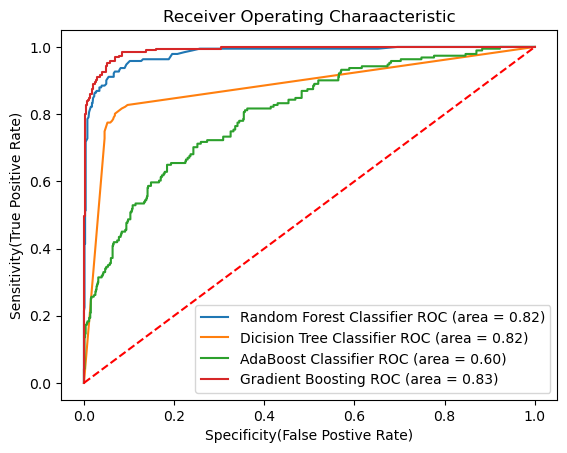

In [46]:
# plot roc auc curve

from sklearn.metrics import roc_curve

auc_models = [
    {
        'label' : 'Random Forest Classifier', 
        'model' : RandomForestClassifier(n_estimators = 200, min_samples_split = 2, max_features = 5, max_depth = None), 
        'auc' : 0.82
    }, 

    {
        'label' : 'Dicision Tree Classifier', 
        'model' : DecisionTreeClassifier(min_samples_split = 2, max_features = 8, max_depth= 15), 
        'auc' : 0.82
    }, 

    {
        'label' : 'AdaBoost Classifier', 
        'model' : AdaBoostClassifier(n_estimators =  70, learning_rate = 1.0), 
        'auc' : 0.60
    }, 

    {
        'label' : 'Gradient Boosting', 
        'model' : GradientBoostingClassifier(n_estimators = 500, min_samples_split = 15, max_depth = 10, loss = 'log_loss', criterion = 'friedman_mse'), 
        'auc' : 0.83
    }
]

# create loop throguh all model

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label = f'{algo['label']} ROC (area = {algo['auc']:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Specificity(False Postive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Charaacteristic')
plt.legend()
plt.show()